# Assignment 6 - Network
This assignment requires you to work with Facebook network data, data preprocessing and networkx. Note that this is real data from real people!

## Obnoxious Consequence
- Martin Snedvig Rasmussen
- Michael Ejdal Lundsgaard
- Morten Bokkenheuser-Bæhr
- Simon Kepp Stennicke

## Part 1: Preparing the Data

The dataset you will be working with is available here: https://snap.stanford.edu/data/egonets-Facebook.html

You're first job is to

1. Download the data
2. Unpack the data
3. Import the data as an undirected graph in networkx

This should all be done from your notebook in Python. This is an important step for you to automate data preprocessing.

**Note:** this could take a while, so if you feel adventurous you can use the multiprocessing library to speed things up.

Hand-in:

- The code for downloading, unpacking and loading the dataset

## Part 2: Analyze the Data

Now, let's take a look at the network you imported.

By node degree we mean the number of edges to and from a node. This is different in an undirected network, where in-degree == out-degree, and a directed network where in-degree != out-degree.

By graph degree we mean the number of edges in the entire network.

Hand-in code that display:

- The number of nodes in the network
- The number of edges in the network
- The average degree in the network
- A visualisation of the network inside your notebook

## Part 3: Find the most Popular People

We're naturally interested in who has the most friends, so we want to extract **top 10**. That is, the 10 most connected people.

Hand-in:

- Code that extracts and reports the 10 people with the most connections in the network

# Solutions


In [1]:
import gzip
import shutil
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint as pp

## Part - 01

The below code snippet is from our download_url.py module

```python
if __name__ == '__main__':
    url = sys.argv[1]
    parser = argparse.ArgumentParser(description='A program that downloads a URL and stores it locally')
    parser.add_argument('url', help='The URL to process')
    parser.add_argument('-d', '--destination', default='./{}'.format(os.path.basename(url)), help='The name of the file to store the url in')
    
    args = parser.parse_args()

    req.urlretrieve(args.url, args.destination)
```

In [16]:
!python download_url.py https://snap.stanford.edu/data/facebook_combined.txt.gz

In [17]:
!ls

Assignment06 - Network.ipynb
download_url.py
facebook_combined.txt.gz
README.md
requirements.txt


In [87]:
with gzip.open('facebook_combined.txt.gz', 'rb') as f_in:
    with open('facebook_combined.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [88]:
!ls

Assignment06 - Network.ipynb
download_url.py
facebook_combined.txt
facebook_combined.txt.gz
README.md
requirements.txt


In [3]:
g = nx.read_edgelist("facebook_combined.txt")

## Part - 02

We thought it would be a bit cheesy to just use the `nx.info(graph)` method to solve this assingment, so we figured it out with other in-build methods and made our own to calculate the avg. degree.

In [92]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [7]:
print('Number of nodes in the network:',g.number_of_nodes())
print('Number of edges in the network:',g.number_of_edges())
print('Average degree in the network:', get_avg_degree(g.number_of_nodes()))

Number of nodes in the network: 4039
Number of edges in the network: 88234
Average degree in the network: 43.69101262688784


In [5]:
def get_avg_degree(no_nodes):
    
    total_degree = 0
    for i in range(no_nodes):
        current_degree = g.degree(str(i))
        total_degree += current_degree

    return total_degree / no_nodes

In [7]:
def draw_graph(g):
    nx.draw(g, node_size=10, width=.05, cmap=plt.cm.Reds,
            with_labels=False, node_color=range(len(g)))

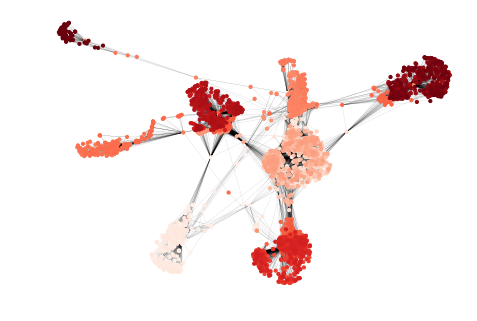

In [10]:
draw_graph(g)

## Part - 03

In [4]:
GLOBAL_PR = np.ones(g.number_of_nodes())

def page_rank(node):
    n = g.number_of_nodes()
    damping = 0.85

    pr_in = np.array([GLOBAL_PR[int(remote)] for remote, _ in g.edges(node)])
    c = np.array([g.degree(remote) for remote, _ in g.edges(node)])
    pr_p = ((1 - damping) / n) + (damping * np.sum(pr_in / c))

    return pr_p
        
def compute_page_rank_step(g):
    return np.array([page_rank(n) for n in g.nodes()])
    
def compute_page_rank(g, no_it=100):
    global GLOBAL_PR
    if no_it == 'converge':
        converged = False
        it_count = 0
        while not converged:
            new_pr = compute_page_rank_step(g)
            converged = np.array_equal(GLOBAL_PR, new_pr)
            GLOBAL_PR = new_pr 
            it_count += 1
            
        print('It took me {} iterations to converge'.format(it_count))
    else:
        for idx in range(no_it):
            GLOBAL_PR = compute_page_rank_step(g)
            
compute_page_rank(g, no_it='converge')

It took me 381 iterations to converge


In [10]:
sorted_GLOBAL_PR = sorted(zip(GLOBAL_PR,range(g.number_of_nodes())),key= lambda x: x[0],reverse=True)
pp(sorted_GLOBAL_PR[:10])

[(0.0002475860361475619, 14),
 (0.0002475860361475619, 20),
 (0.0002475860361475619, 39),
 (0.0002475860361475619, 57),
 (0.0002475860361475619, 66),
 (0.0002475860361475619, 144),
 (0.0002475860361475619, 227),
 (0.0002475860361475619, 258),
 (0.0002475860361475617, 21),
 (0.0002475860361475617, 48)]


In [8]:
print('The highest PR is {}'.format(GLOBAL_PR[np.argmax(GLOBAL_PR)]))
print('The node with the highest PR is {}'.format(np.argmax(GLOBAL_PR)))

The highest PR is 0.0002475860361475619
The node with the highest PR is 14
